In [1]:
import numpy as np

from registration_framework import Registration
from optims.cmaes_optim import CMAES
from optims.cso_optim import CSO_optim
from optims.pso_optim import PSO_optim
from optims.ppso_optim import PPSO_optim
from optims.ppso_optim_improved1 import PPSO_optim1, PPSO_optim2, PPSO_optim3, PPSO_optim1_1
from utils.tools import Tools
from optim_test_fun import OptimFunTest

# 进行图像匹配的操作
config = Tools.load_yaml_config("configs/optim_test_config.yaml")
res_path = f"{config.data_save_path}/{config.record_id}"
file_name = f"{config.record_id}_config.yaml"
Tools.save_obj_yaml(res_path, file_name, config)
config.max_fes = config.solution_dimension * 10000

run_times = config.run_times

In [2]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
# 设置随机种子
# print(np.random.uniform(-1, 20, 2))

# 运行测试函数
test_fun_framework = OptimFunTest(config)
optim_classes = [PSO_optim, PPSO_optim, PPSO_optim1, PPSO_optim1_1, PPSO_optim2, PPSO_optim3, CSO_optim]
# optim_classes = [PSO_optim, CSO_optim, PPSO_optim, PPSO_optim1_1, PPSO_optim2, PPSO_optim3]
# test_fun_framework.test_all_optims_funs(optim_classes)

# 下面这个函数可以交给test_fun_framework来处理
# test_fun_framework.test_optim_funs(PPSO_optim1)
# test_fun_framework.test_single_optim_fun(PSO_optim, 1)

test_fun_framework.test_all_optims_multi_process(optim_classes)


# for i in range(run_times):
#     rand_seed = config.rand_seed + i
#     # 每一次迭代随机种子+1，这样的方式保证结果的一致
#     np.random.seed(rand_seed)
#     optim = PPSO_optim(config)
#     optim.set_runid(i)
#     test_fun_framework.set_fitness_obj(optim)
#     optim.run_std_optim()

KeyboardInterrupt: 

In [3]:
method_names = [PSO_optim.__name__, PPSO_optim.__name__]
data_dict = test_fun_framework.read_optims_fitness_FEs(method_names)


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
# 绘制图像，读取多条数据，然后取中位数

# method_names = [PSO_optim.__name__, PPSO_optim.__name__]
method_names = []

for optim_clas in optim_classes:
    method_names.append(optim_clas.__name__)

data_dict = test_fun_framework.read_optims_fitness_FEs(method_names)


PSO_optim, 2, mean: 6.7622e+07, std: 7.5215e+07
PSO_optim, 3, mean: 8.2839e+10, std: 6.1108e+10
PSO_optim, 7, mean: 2.2361e+02, std: 6.3314e+01
PSO_optim, 8, mean: 2.0934e+01, std: 6.3350e-02
PSO_optim, 9, mean: 2.8049e+01, std: 3.5841e+00
PPSO_optim, 2, mean: 9.6806e+05, std: 3.6762e+05
PPSO_optim, 3, mean: 4.5124e+07, std: 9.0584e+07
PPSO_optim, 7, mean: 9.8578e+00, std: 4.8732e+00
PPSO_optim, 8, mean: 2.0942e+01, std: 4.6912e-02
PPSO_optim, 9, mean: 2.0830e+01, std: 6.3750e+00
PPSO_optim1, 2, mean: 5.1789e+05, std: 3.0093e+05
PPSO_optim1, 3, mean: 4.7196e+09, std: 1.2768e+10
PPSO_optim1, 7, mean: 1.7544e+02, std: 7.0580e+01
PPSO_optim1, 8, mean: 2.1101e+01, std: 5.8752e-02
PPSO_optim1, 9, mean: 4.2636e+01, std: 1.2853e+00
PPSO_optim1_1, 2, mean: 7.9986e+05, std: 4.0930e+05
PPSO_optim1_1, 3, mean: 3.3073e+10, std: 5.3636e+10
PPSO_optim1_1, 7, mean: 2.3462e+02, std: 8.9103e+01
PPSO_optim1_1, 8, mean: 2.1128e+01, std: 3.9133e-02
PPSO_optim1_1, 9, mean: 4.2672e+01, std: 1.3924e+00
PPSO_

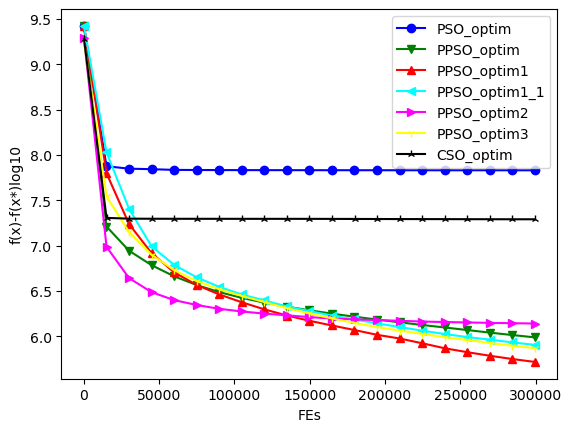

In [12]:
test_fun_framework.show_mean_convergence_line(data_dict, method_names, 2, 20)
